# Objective: Learn to do clustering and noise reduction in data using PCA 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd 
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

## PCA using SVD

In [2]:
def pca(X):
    U, S, PTrans = svd(X, full_matrices=False)
    Sigma = np.diag(S)
    T=np.dot(U,Sigma)
    P=PTrans.T
    return T, Sigma, P #Score, Variace, Loadings

In [3]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

In [4]:
# Find out the original dimension of the data
X = digits.data
y = digits.target
print("Shape of X",X.shape)
print("Shape of y", y.shape)

Shape of X (1797, 64)
Shape of y (1797,)


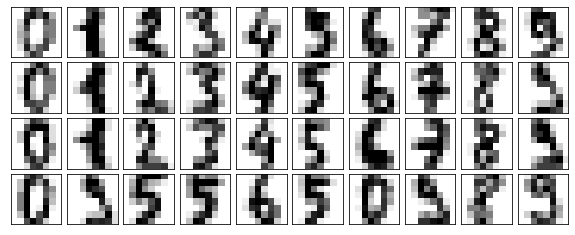

In [5]:
#Visualize the original data
plot_digits(X)

In [6]:
# Mean-center the data
Xm = np.mean(X, axis=0)
#X = X - Xm

### Task 1: Dimensionality reduction: Conduct PCA on the the matrix $X$ to find out the dimension required to capture 80% of the variance

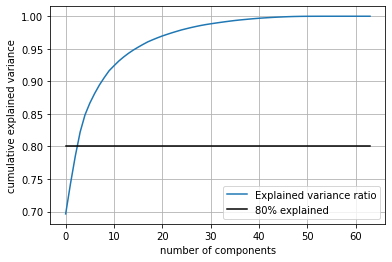

80% explained variance after 4 PCs. (82.22%)


In [7]:
T, Sigma, P = pca(X)

def plot_explained_variance(Sigma, variance_threshold=0.8):
    SS = np.diag(Sigma)
    explained_variance = (SS ** 2) / 4  # TODO: why dividing by 4?
    explained_variance_ratio = (explained_variance / explained_variance.sum())
    cumsum = np.cumsum(explained_variance_ratio)
    plt.plot(cumsum, label="Explained variance ratio")
    plt.plot(variance_threshold * np.ones(explained_variance_ratio.shape), "k", label=f"{100*variance_threshold:.0f}% explained")
    plt.grid()
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.legend()
    plt.show()

    for i, variance in enumerate(cumsum):
        if variance > variance_threshold:
            break
    print(f"{100*variance_threshold:.0f}% explained variance after {i+1} PCs. ({100*variance:.2f}%)")

    return i+1


plot_explained_variance(Sigma);

###  Task 2: Clustering: Project the original data matrix X on the first two PCs and draw the scalar plot 

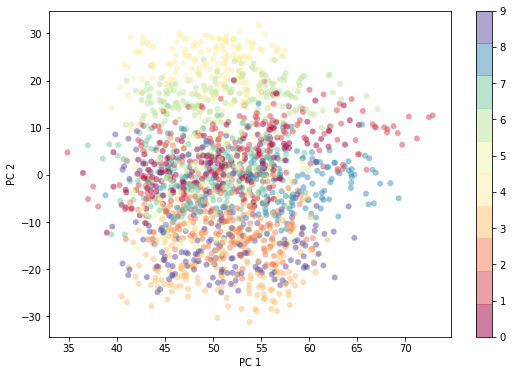

In [8]:
t1 = T[:,0]
t2 = T[:,1]
plt.figure(figsize=(9,6))
plt.scatter(t1, t2,
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar()
plt.show()

### Task 3: Denoising: Remove noise from the noisy data

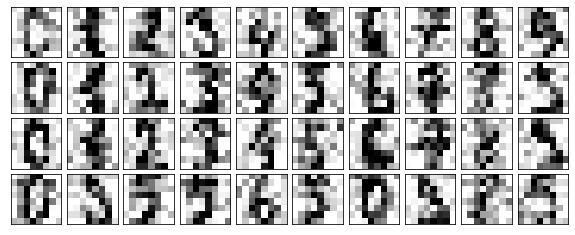

In [9]:
# Adding noise to the original data
X = digits.data
y = digits.target

np.random.seed(42)
noisy = np.random.normal(X, 4)
plot_digits(noisy)

Tips: 

* Decompose the noisy data using PCA 
* Reconstruct the data using just a few dominant components.For eg. check the variance plot 

Since the nature of the noise is more or less similar across all the digits, they are not the fearues with enough variance to discriminate between the digits. 

In [10]:
# Mean-center noisy data
noisy_mean = np.mean(noisy, axis=0)
noisy = noisy - noisy_mean

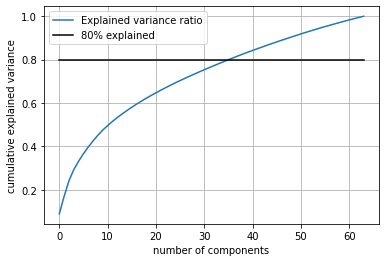

80% explained variance after 37 PCs. (80.83%)


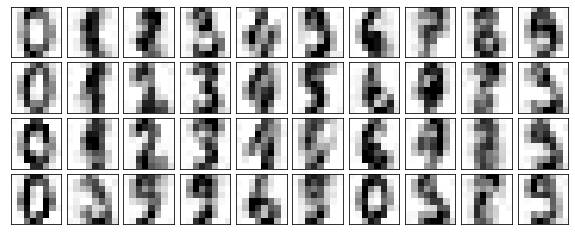

In [11]:
T, Sigma, P = pca(noisy)

pc_count = plot_explained_variance(Sigma, variance_threshold=0.8)

pc_count = 10
X_denoised = T[:,:pc_count] @ P[:,:pc_count].T
plot_digits(X_denoised + noisy_mean)

Using the PC count from setting a threshold of e.g. 80% yielded results that still looked very noisy. Manually reducing the number of PCs gave the above results which looks much less noisy, but are still legible. 

### Task 4: Study the impact of normalization of the dataset before conducting PCA. Discuss if it is critical to normalize this particular data compared to the dataset in other notebooks

In [12]:
X = digits.data
y = digits.target

# Calculate mean and std of each variable
Xm = np.mean(X, axis=0)
Xs = np.std(X, axis=0)

print(f"Data: min: {X.min():.2f}, max: {X.max():.2f}, average: {X.mean():.2f}")
print(f"Mean: min: {Xm.min():.2f}, max: {Xm.max():.2f}, average: {Xm.mean():.2f}")
print(f"Std:  min: {Xs.min():.2f}, max: {Xs.max():.2f}, average: {Xs.mean():.2f}")

# Standard deviation of 0 does not work, set it to 1 to not get any errors.
# TODO: will this give correct results?
Xs[Xs == 0] = 1


Data: min: 0.00, max: 16.00, average: 4.88
Mean: min: 0.00, max: 12.09, average: 4.88
Std:  min: 0.00, max: 6.54, average: 3.68


Comparing the order of magnitude for the mean and the data, it is possible that mean-centering could give better results. It is also likely that normalizing using the standard deviation would yield better results. Let us compare:

1. No augmentations
2. Only mean centering
3. Only normalizing
4. Mean centering and normalizing

--- 1. No augmentation ---


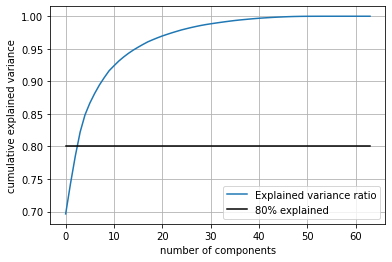

80% explained variance after 4 PCs. (82.22%)

--- 2. Only mean centering ---


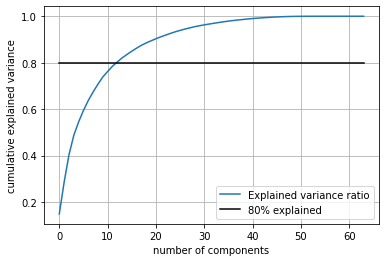

80% explained variance after 13 PCs. (80.29%)

--- 3. Only normalizing ---


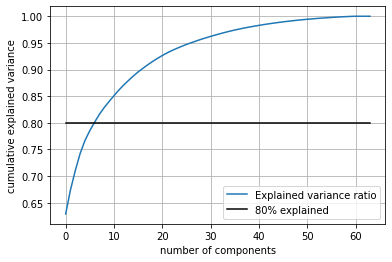

80% explained variance after 7 PCs. (80.12%)

--- 4. Mean centering and normalizing ---


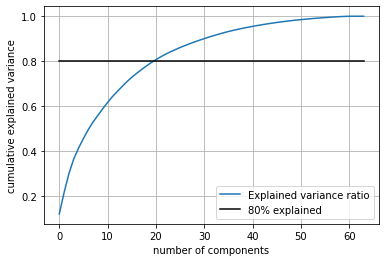

80% explained variance after 21 PCs. (80.66%)



In [13]:
print("--- 1. No augmentation ---")
T1, Sigma1, P1 = pca(X)
pc_count1 = plot_explained_variance(Sigma1)
print()

print("--- 2. Only mean centering ---")
T2, Sigma2, P2 = pca(X - Xm)
pc_count2 = plot_explained_variance(Sigma2)
print()

print("--- 3. Only normalizing ---")
T3, Sigma3, P3 = pca(X / Xs)
pc_count3 = plot_explained_variance(Sigma3)
print()

print("--- 4. Mean centering and normalizing ---")
T4, Sigma4, P4 = pca((X - Xm) / Xs)
pc_count4 = plot_explained_variance(Sigma4)
print()

Is more or fewer PCs good? I think fewer, but unsure. 

Normalizing does not make much sense since all variables are pixel values and are of the same order of magnitude. 

The numbers above makes sense as when you normalize using std the distributions become "rounder" in all dimensions, so the distribution of variance should be more even. 

# All the above excercise can be done using the SKLEAR library as follows

In [14]:
from sklearn.decomposition import PCA
X=digits.data
y=digits.target

(1797, 64)
(1797, 2)


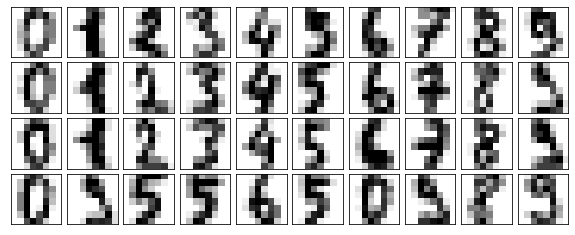

In [15]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)
plot_digits(digits.data)

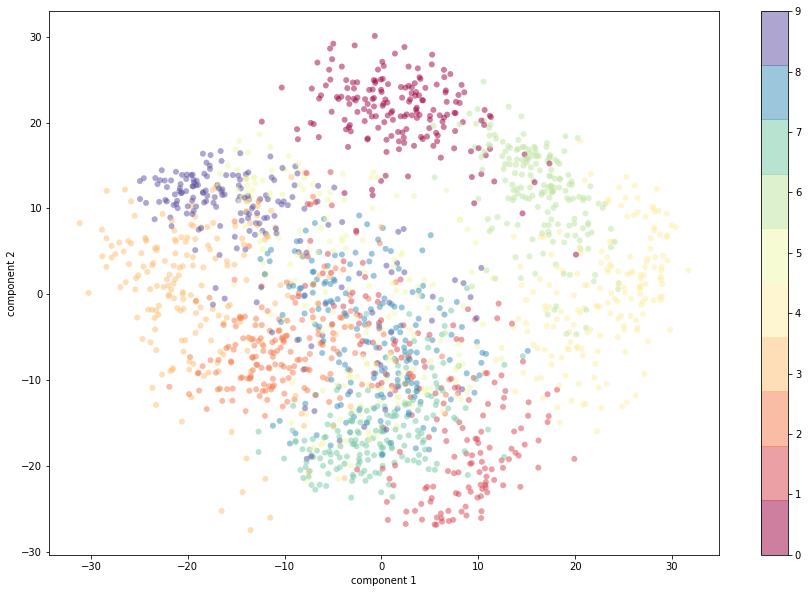

In [16]:
plt.figure(figsize=(15,10))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

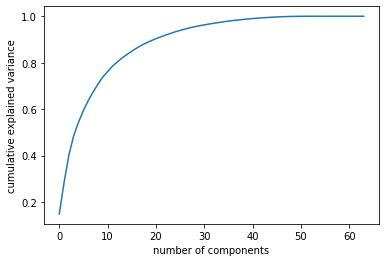

In [17]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

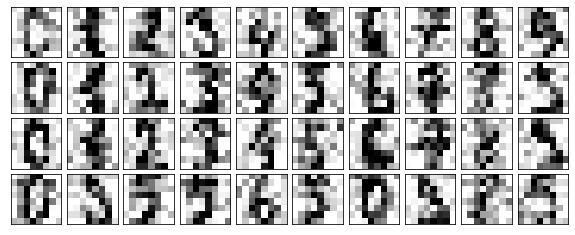

In [18]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)


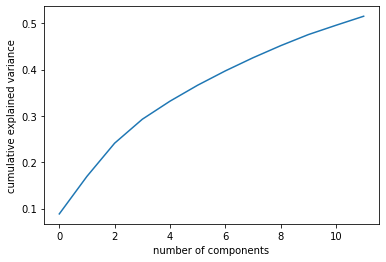

In [19]:
pca = PCA(0.50).fit(noisy) # 50% of the variance amounts to 12 principal components.
pca.n_components_
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

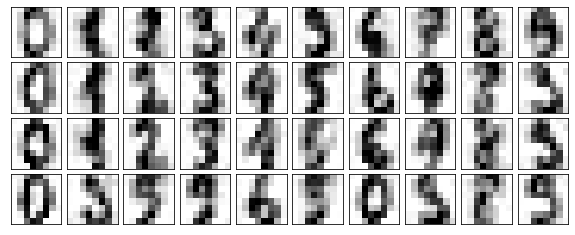

In [20]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)